## Import Library & Dataset

In [1]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('IPM.csv')
data

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


## Explorasi Data

In [3]:
#Menampilkan 5 baris teratas
data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [4]:
#Menampilkan 5 baris terakhir dari dataset
data.tail()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High
2195,12.91,11059,8.17,71.20,High


In [5]:
#Menampilkan ukuran dimensi dari dataset
data.shape

(2196, 5)

In [6]:
#Mengetahui adanya data yang duplikat
data.duplicated().sum()

0

In [7]:
#Mengetahui data yang bernilai kosong
data.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [8]:
#Mengetahui informasi umum dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [9]:
data.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


In [10]:
data.nunique()

Harapan_Lama_Sekolah      499
Pengeluaran_Perkapita    1930
Rerata_Lama_Sekolah       633
Usia_Harapan_Hidup       1054
IPM                         4
dtype: int64

## Preprocessing Data

In [24]:
# Menkonversi Nilai Kategorial menjadi Numerik
encoder = ce.OrdinalEncoder(cols = ['IPM'])
data = encoder.fit_transform(data)
data.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,1
1,13.90,7148,9.48,65.28,2
2,14.32,8776,8.68,67.43,2
3,14.60,8180,8.88,64.40,2
4,14.01,8030,9.67,68.22,2


In [25]:
#Mengelompokkan variabel dataset yang berupa kategori
data_cat = data[['IPM']]

In [26]:
data_cat

,IPM
0,1
1,2
2,2
3,2
4,2
...,...
2191,4
2192,4
2193,4
2194,1


In [27]:
#Mengetahui nilai kategori dari tiap variabel
for i in data_cat.columns:
  print(data_cat[i].unique())

[1 2 3 4]


In [28]:
#Mengetahui frekuensi tiap kategori dari variabel dataset
for i in data_cat.columns:
  print(data_cat[i].value_counts())

2    1128
1     829
3     146
4      93
Name: IPM, dtype: int64


## Visualisasi Data

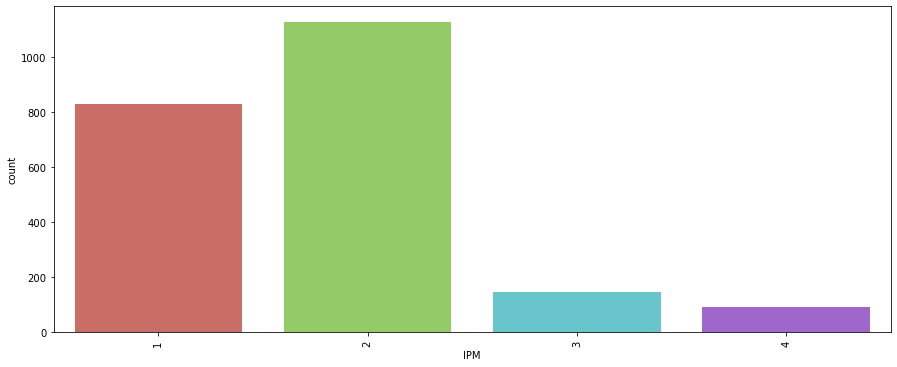

In [29]:
for i in data_cat.columns:
  plt.figure(figsize = (15,6))
  sns.countplot(data_cat[i],data=data_cat,palette='hls')
  plt.xticks(rotation = 90)
  plt.show()

1 = High

2 = Normal

3 = Very-High

4 = Low

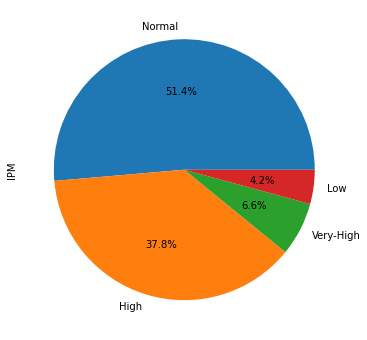

In [16]:
for i in data_cat.columns:
  plt.figure(figsize=(15,6))
  data_cat[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
  plt.xticks(rotation=90)
  plt.show()

Berdasarkan dari 2 visualisasi di atas, dapat diperoleh informasi berupa :

- pada dataset frekuensi IPM untuk nilai tertingginya terdapat pada " Normal "
- dilihat dari visualisasi pie chart terlihat untuk data normal memiliki 51.4% dari dataset IPM

In [30]:
data.sample(10)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
1117,17.39,16892,12.64,71.36,3
2139,13.89,7323,10.18,64.89,2
1272,11.98,8290,6.97,69.91,2
363,12.81,12143,8.34,68.83,1
1034,13.03,10316,8.52,66.41,2
1570,12.44,8982,6.74,65.79,2
1023,12.77,9168,7.89,65.06,2
1356,13.00,11533,8.53,72.27,1
627,13.20,10675,9.14,71.60,1
1114,13.97,9682,8.66,67.11,2


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [32]:
#Menghapus variabel IPM dari dataset yang masuk sebagai variabel X dan inisialisasi variabel stroke sebagai variabel y
X = data.drop(['IPM'],axis = 1)
y = data['IPM']

In [33]:
#Membagi dataset menjadi data training dan testing dengan rasio 33% data digunakan sebagai data testing. Dengan pemilihan random data sebesar 42.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1471, 4), (725, 4))

## Modelling

In [34]:
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
classifier_rf = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [35]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred = classifier_rf.predict(X_test)

## Evaluation

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)

In [38]:
print(cm)

[[273   7   6   0]
 [ 12 347   0   0]
 [  3   0  46   0]
 [  0   1   0  30]]


In [39]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train))

Training-set accuracy score: 0.9993201903467029


In [40]:
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', classifier_rf.score(X_test, y_test))

Training-set accuracy score: 0.96


In [41]:
#Proporsi kelas 1 ()
y_train.sum()/y_train.count()

1.7811012916383413

## Balancing Data

In [42]:
from imblearn.over_sampling import SMOTE
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [43]:
# MODEL
#Membuat model random forest dengan banyak tree dalam forest adalah 10 serta untuk mengukur kualitas split menggunakan entropi untuk perolehan infomasi
classifier_rf2 = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf2.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [44]:
#Proporsi kelas 1 (IPM) setelah diSMOTE
y_train_SMOTE.sum()/y_train_SMOTE.count()

2.5

In [45]:
#Memperoleh nilai y prediksi dari variabel-variabel X data testing
y_pred = classifier_rf2.predict(X_test)

In [46]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[268,   9,   9,   0],
       [ 13, 346,   0,   0],
       [  1,   0,  48,   0],
       [  0,   0,   0,  31]], dtype=int64)

In [47]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf2.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', classifier_rf2.score(X_test, y_test))

Training-set accuracy score: 0.9993498049414824
Training-set accuracy score: 0.9558620689655173


## AdaBoost Model

In [48]:
# --- Applying AdaBoost ---
from sklearn.ensemble import AdaBoostClassifier
ABclassifier = AdaBoostClassifier(n_estimators=100)

ABclassifier.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB = ABclassifier.predict(X_test)

In [49]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', ABclassifier.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', ABclassifier.score(X_test, y_test))

Training-set accuracy score: 0.3881664499349805
Training-set accuracy score: 0.5655172413793104


Kesimpulan

- Ketika melakukan Training dan Testing Data menggunakan Random Forest mendapatkan nilai akurasi yang tinggi pada
  data training 0.9993498049414824 dan pada data testing 0.9682758620689655.
  
- Sedangkan melakukan Training dan Testing Data menggunakan AdaBoost Model hanya mendapatkan nilai akurasi pada
  data training 0.3842652795838752 dan pada data testing 0.5668965517241379.
  
- Jika dibandingkan Random Forest dengan AdaBoost Model pada Dataset seperti IPM ini lebih bagus menggunakan Random
  Forest daripada menggunakan AdaBoost Model 